In [1]:
import pandas as pd

In [81]:
import missingno as mino
import matplotlib.pyplot as plt

In [83]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [57]:
data = pd.read_excel('store.xlsx')

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20625 entries, 0 to 20624
Data columns (total 9 columns):
광역시도     20625 non-null object
시군구      20625 non-null object
업종대분류    20625 non-null object
업종중분류    20625 non-null object
1년미만     20617 non-null float64
1~2년     20617 non-null float64
2~3년     20617 non-null float64
3~5년     20617 non-null float64
5년 이상    20617 non-null float64
dtypes: float64(5), object(4)
memory usage: 1.4+ MB


In [59]:
data

,광역시도,시군구,업종대분류,업종중분류,1년미만,1~2년,2~3년,3~5년,5년 이상
0,서울특별시,종로구,관광/여가/오락,연극/영화/극장,1.0,2.0,42.0,39.0,16.0
1,서울특별시,종로구,관광/여가/오락,전시/관람,0.0,6.0,18.0,35.0,44.0
2,서울특별시,종로구,관광/여가/오락,PC/오락/당구/볼링등,0.0,5.0,12.0,86.0,20.0
3,서울특별시,종로구,관광/여가/오락,경마/경륜/성인오락,0.0,1.0,1.0,1.0,2.0
4,서울특별시,종로구,관광/여가/오락,스포츠/운동,0.0,0.0,1.0,0.0,0.0
5,서울특별시,종로구,관광/여가/오락,요가/단전/마사지,0.0,1.0,6.0,18.0,15.0
6,서울특별시,종로구,관광/여가/오락,놀이/여가/취미,0.0,0.0,4.0,6.0,2.0
7,서울특별시,종로구,관광/여가/오락,무도/유흥/가무,1.0,7.0,10.0,75.0,14.0
8,서울특별시,종로구,부동산,부동산중개,33.0,20.0,47.0,60.0,110.0
9,서울특별시,종로구,부동산,평가/개발/관리,2.0,3.0,11.0,3.0,107.0


In [60]:
data_raw = data.copy()

In [62]:
data_raw_na = data_raw.dropna()

In [66]:
data_raw_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20617 entries, 0 to 20624
Data columns (total 9 columns):
광역시도     20617 non-null object
시군구      20617 non-null object
업종대분류    20617 non-null object
업종중분류    20617 non-null object
1년미만     20617 non-null float64
1~2년     20617 non-null float64
2~3년     20617 non-null float64
3~5년     20617 non-null float64
5년 이상    20617 non-null float64
dtypes: float64(5), object(4)
memory usage: 1.6+ MB


In [67]:
data = data_raw_na.melt(data_raw_na.columns[:4],var_name='년',value_name='수')

In [75]:
data['수'] = data['수'].astype('int')

In [76]:
data

,광역시도,시군구,업종대분류,업종중분류,년,수
0,서울특별시,종로구,관광/여가/오락,연극/영화/극장,1년미만,1
1,서울특별시,종로구,관광/여가/오락,전시/관람,1년미만,0
2,서울특별시,종로구,관광/여가/오락,PC/오락/당구/볼링등,1년미만,0
3,서울특별시,종로구,관광/여가/오락,경마/경륜/성인오락,1년미만,0
4,서울특별시,종로구,관광/여가/오락,스포츠/운동,1년미만,0
5,서울특별시,종로구,관광/여가/오락,요가/단전/마사지,1년미만,0
6,서울특별시,종로구,관광/여가/오락,놀이/여가/취미,1년미만,0
7,서울특별시,종로구,관광/여가/오락,무도/유흥/가무,1년미만,1
8,서울특별시,종로구,부동산,부동산중개,1년미만,33
9,서울특별시,종로구,부동산,평가/개발/관리,1년미만,2


In [78]:
data = data[data['수'] != 0]

In [80]:
data[data.iloc[:,-3] == '연극/영화/극장'].groupby('광역시도').count()

,시군구,업종대분류,업종중분류,년,수
광역시도,,,,,
강원도,34,34,34,34,34
경기도,109,109,109,109,109
경상남도,41,41,41,41,41
경상북도,40,40,40,40,40
광주광역시,18,18,18,18,18
대구광역시,27,27,27,27,27
대전광역시,17,17,17,17,17
부산광역시,42,42,42,42,42
서울특별시,91,91,91,91,91


In [49]:
data_raw_na.melt(data_raw_na.columns[:4],var_name='년',value_name='수')

,광역시도,시군구,업종대분류,업종중분류,년,수
0,서울특별시,종로구,관광/여가/오락,연극/영화/극장,1년미만,1.0
1,서울특별시,종로구,관광/여가/오락,전시/관람,1년미만,0.0
2,서울특별시,종로구,관광/여가/오락,PC/오락/당구/볼링등,1년미만,0.0
3,서울특별시,종로구,관광/여가/오락,경마/경륜/성인오락,1년미만,0.0
4,서울특별시,종로구,관광/여가/오락,스포츠/운동,1년미만,0.0
5,서울특별시,종로구,관광/여가/오락,요가/단전/마사지,1년미만,0.0
6,서울특별시,종로구,관광/여가/오락,놀이/여가/취미,1년미만,0.0
7,서울특별시,종로구,관광/여가/오락,무도/유흥/가무,1년미만,1.0
8,서울특별시,종로구,부동산,부동산중개,1년미만,33.0
9,서울특별시,종로구,부동산,평가/개발/관리,1년미만,2.0


In [56]:
data['수'].astype('int')

KeyError: '수'

In [41]:
data_raw.isna().any()

광역시도     False
시군구      False
업종대분류    False
업종중분류    False
1년미만     False
1~2년     False
2~3년     False
3~5년     False
5년 이상    False
dtype: bool

In [42]:
data = data_raw.copy()

In [45]:
data

,광역시도,시군구,업종대분류,업종중분류,1년미만,1~2년,2~3년,3~5년,5년 이상
0,서울특별시,종로구,관광/여가/오락,연극/영화/극장,1.0,2.0,42.0,39.0,16.0
1,서울특별시,종로구,관광/여가/오락,전시/관람,0.0,6.0,18.0,35.0,44.0
2,서울특별시,종로구,관광/여가/오락,PC/오락/당구/볼링등,0.0,5.0,12.0,86.0,20.0
3,서울특별시,종로구,관광/여가/오락,경마/경륜/성인오락,0.0,1.0,1.0,1.0,2.0
4,서울특별시,종로구,관광/여가/오락,스포츠/운동,0.0,0.0,1.0,0.0,0.0
5,서울특별시,종로구,관광/여가/오락,요가/단전/마사지,0.0,1.0,6.0,18.0,15.0
6,서울특별시,종로구,관광/여가/오락,놀이/여가/취미,0.0,0.0,4.0,6.0,2.0
7,서울특별시,종로구,관광/여가/오락,무도/유흥/가무,1.0,7.0,10.0,75.0,14.0
8,서울특별시,종로구,부동산,부동산중개,33.0,20.0,47.0,60.0,110.0
9,서울특별시,종로구,부동산,평가/개발/관리,2.0,3.0,11.0,3.0,107.0


In [27]:
data = data[data['수'] != 0]

In [29]:
data[data.iloc[:,-3] == '연극/영화/극장'].groupby('광역시도').count()

,시군구,업종대분류,업종중분류,년,수
광역시도,,,,,
강원도,104,104,104,104,104
경기도,264,264,264,264,264
경상남도,126,126,126,126,126
경상북도,120,120,120,120,120
광주광역시,43,43,43,43,43
대구광역시,67,67,67,67,67
대전광역시,42,42,42,42,42
부산광역시,117,117,117,117,117
서울특별시,216,216,216,216,216


In [32]:
data[(data['광역시도']=='서울특별시') & (data['업종대분류'] == '부동산')].groupby('시군구').count() 

,광역시도,업종대분류,업종중분류,년,수
시군구,,,,,
강남구,48,48,48,48,48
강동구,45,45,45,45,45
강북구,42,42,42,42,42
강서구,47,47,47,47,47
관악구,44,44,44,44,44
광진구,43,43,43,43,43
구로구,44,44,44,44,44
금천구,42,42,42,42,42
노원구,41,41,41,41,41


In [53]:
import inspect
print(inspect.getsource(pd.Grouper))

class Grouper(object):
    """
    A Grouper allows the user to specify a groupby instruction for a target
    object

    This specification will select a column via the key parameter, or if the
    level and/or axis parameters are given, a level of the index of the target
    object.

    These are local specifications and will override 'global' settings,
    that is the parameters axis and level which are passed to the groupby
    itself.

    Parameters
    ----------
    key : string, defaults to None
        groupby key, which selects the grouping column of the target
    level : name/number, defaults to None
        the level for the target index
    freq : string / frequency object, defaults to None
        This will groupby the specified frequency if the target selection
        (via key or level) is a datetime-like object. For full specification
        of available frequencies, please see `here
        <http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-alias

In [54]:
from collections import Counter
Counter('aaaabbbdse')

Counter({'a': 4, 'b': 3, 'd': 1, 's': 1, 'e': 1})

In [55]:
data_raw['업종대분류'].value_counts()

소매          5774
생활서비스       4194
학문/교육       3187
음식          3180
관광/여가/오락    1612
부동산         1087
숙박           901
스포츠          682
Name: 업종대분류, dtype: int64

## dddddd

In [84]:
import numpy as np

In [86]:
data.notna()
# isna의 반대 -> 유효데이터.

,광역시도,시군구,업종대분류,업종중분류,년,수
0,True,True,True,True,True,True
7,True,True,True,True,True,True
8,True,True,True,True,True,True
9,True,True,True,True,True,True
11,True,True,True,True,True,True
13,True,True,True,True,True,True
14,True,True,True,True,True,True
15,True,True,True,True,True,True
18,True,True,True,True,True,True
19,True,True,True,True,True,True


## groupby 3총사
1. groupby
2. (통계:crosstable) crosstab
3. pivot_table

In [89]:
pd.crosstab(data['광역시도'],data['년'],data['수'],aggfunc='count')
#                 y축          x축

# pd.crosstab(
#     index,
#     columns,
#     values=None,
#     rownames=None,
#     colnames=None,
#     aggfunc=None,
#     margins=False,
#     margins_name='All',
#     dropna=True,
#     normalize=False,
# )

#Groupby와의 차이

년,1~2년,1년미만,2~3년,3~5년,5년 이상
광역시도,,,,,
강원도,779,1023,1082,1284,1523
경기도,2041,2229,2502,2687,2798
경상남도,821,898,1049,1307,1530
경상북도,876,1136,1260,1539,1853
광주광역시,363,383,418,439,455
대구광역시,509,574,632,686,711
대전광역시,330,365,437,451,457
부산광역시,873,1021,1128,1326,1406
서울특별시,1718,1728,2090,2158,2239


In [92]:
data.groupby(['년','광역시도']).count()

시군구  업종대분류  업종중분류     수
년     광역시도                             
1~2년  강원도       779    779    779   779
      경기도      2041   2041   2041  2041
      경상남도      821    821    821   821
      경상북도      876    876    876   876
      광주광역시     363    363    363   363
      대구광역시     509    509    509   509
      대전광역시     330    330    330   330
      부산광역시     873    873    873   873
      서울특별시    1718   1718   1718  1718
      세종특별자치시    68     68     68    68
      울산광역시     268    268    268   268
      인천광역시     553    553    553   553
      전라남도      847    847    847   847
      전라북도      607    607    607   607
      제주특별자치도   131    131    131   131
      충청남도      684    684    684   684
      충청북도      527    527    527   527
1년미만  강원도      1023   1023   1023  1023
      경기도      2229   2229   2229  2229
      경상남도      898    898    898   898
      경상북도     1136   1136   1136  1136
      광주광역시     383    383    383   383
      대구광역시     574    574    574   574
      대전광역시     365    365    365   365
      부산광역시    1021   1021   1021  1021
      서울특별시    1728   1728   1728  1728
      세종특별자치시    73     73     73    73
      울산광역시     320    320    320   320
      인천광역시     606    606    606   606
      전라남도     1141   1141   1141  1141
...             ...    ...    ...   ...
3~5년  광주광역시     439    439    439   439
      대구광역시     686    686    686   686
      대전광역시     451    451    451   451
      부산광역시    1326   1326   1326  1326
      서울특별시    2158   2158   2158  2158
      세종특별자치시    86     86     86    86
      울산광역시     405    405    405   405
      인천광역시     827    827    827   827
      전라남도     1466   1466   1466  1466
      전라북도     1019   1019   1019  1019
      제주특별자치도   174    174    174   174
      충청남도     1148   1148   1148  1148
      충청북도      800    800    800   800
5년 이상 강원도      1523   1523   1523  1523
      경기도      2798   2798   2798  2798
      경상남도     1530   1530   1530  1530
      경상북도     1853   1853   1853  1853
      광주광역시     455    455    455   455
      대구광역시     711    711    711   711
      대전광역시     457    457    457   457
      부산광역시    1406   1406   1406  1406
      서울특별시    2239   2239   2239  2239
      세종특별자치시    85     85     85    85
      울산광역시     443    443    443   443
      인천광역시     847    847    847   847
      전라남도     1810   1810   1810  1810
      전라북도     1166   1166   1166  1166
      제주특별자치도   184    184    184   184
      충청남도     1307   1307   1307  1307
      충청북도      931    931    931   931

[85 rows x 4 columns]

In [ ]:
#축 바꿀때(x<->y)(numpy와 이름이 다르다) sci   (Stack은 Column을 Index로)

In [93]:
data.groupby(['년','광역시도']).count().unstack()

시군구                                                          ...  \
광역시도    강원도   경기도  경상남도  경상북도 광주광역시 대구광역시 대전광역시 부산광역시 서울특별시 세종특별자치시  ...   
년                                                                    ...   
1~2년    779  2041   821   876   363   509   330   873  1718      68  ...   
1년미만   1023  2229   898  1136   383   574   365  1021  1728      73  ...   
2~3년   1082  2502  1049  1260   418   632   437  1128  2090      89  ...   
3~5년   1284  2687  1307  1539   439   686   451  1326  2158      86  ...   
5년 이상  1523  2798  1530  1853   455   711   457  1406  2239      85  ...   

          수                                                           
광역시도  부산광역시 서울특별시 세종특별자치시 울산광역시 인천광역시  전라남도  전라북도 제주특별자치도  충청남도 충청북도  
년                                                                     
1~2년    873  1718      68   268   553   847   607     131   684  527  
1년미만   1021  1728      73   320   606  1141   800     152   887  615  
2~3년   1128  2090      89   362   753  1236   805     165   943  670  
3~5년   1326  2158      86   405   827  1466  1019     174  1148  800  
5년 이상  1406  2239      85   443   847  1810  1166     184  1307  931  

[5 rows x 68 columns]

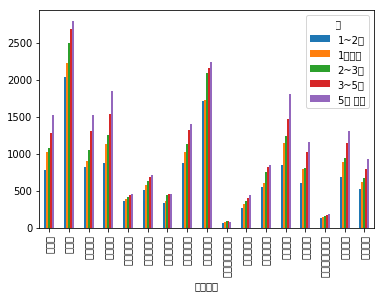

In [94]:
pd.crosstab(data['광역시도'],data['년'],data['수'],aggfunc='count').plot.bar()

In [98]:
data.pivot_table('수','년',aggfunc='count',margins=True)
#입력을 강제하는 애. default가 None이면 입력해야함.
# aggfunc (default)=mean(평균)
# margins=True =>> 부분합.

,수
년,
1~2년,11995
1년미만,13951
2~3년,15621
3~5년,17802
5년 이상,19745
All,79114


In [99]:
!pip install pdvega

  Stored in directory: C:\Users\David\AppData\Local\pip\Cache\wheels\64\67\6c\3faafbf516d2bdfab7b3efc6e5db7dcf8dce060ea9da8fbe62
  Stored in directory: C:\Users\David\AppData\Local\pip\Cache\wheels\bb\d1\fa\c1f13e071650f6dd9c6b986b7ee4d19dbfc7bc32a902593d39
Successfully built pdvega vega3


In [ ]:
# Grammar of Graphics
#문법에 맞추면 알아서 그림그려줌

In [100]:
b = pd.crosstab(data['광역시도'],data['년'],data['수'],aggfunc='count')

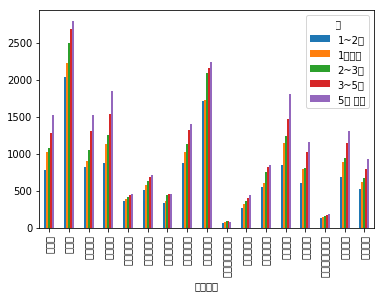

In [101]:
b.plot.bar()

In [102]:
import pdvega

C:\Users\David\Anaconda3\lib\site-packages\pdvega\_core.py:625: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  "type": infer_vegalite_type(df[x], ordinal_threshold=50)
C:\Users\David\Anaconda3\lib\site-packages\pdvega\_core.py:629: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  "type": infer_vegalite_type(df["value"], ordinal_threshold=0),
C:\Users\David\Anaconda3\lib\site-packages\pdvega\_core.py:634: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  "type": infer_vegalite_type(df["variable"])


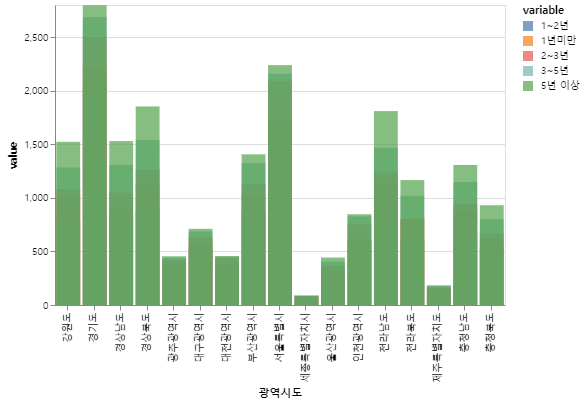

In [104]:
b.vgplot.bar()